<a href="https://colab.research.google.com/github/Ankit-770/Azure_hotel_price_optimisation_ML/blob/main/Ankit_Quantzig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantzig | DS Assignment | Optimizing Hotel Room Pricing for Revenue Maximization


Name - Ankit Choudhary


## Case Study:

Optimizing Hotel Room Pricing for Revenue Maximization
As part of our hiring process, you are requested to prepare a PowerPoint presentation for the business case below. Note that the dataset provided is a sample and may need to be modified or expanded to better suit the needs of the case study. The case aims to assess the solution development process. When in doubt, feel free to make assumptions based on general business considerations.

Business Context

• Azure Hotels is a hospitality company with a chain of 50 hotels across 20 cities in the United States. They offer a range of rooms, from budget-friendly options to luxury suites.

• Azure Hotels has a dynamic pricing strategy, where room prices are adjusted based on demand, competition, and other market factors. However, they want to optimize their pricing strategy to maximize revenue and profitability.
• The company has collected data on room bookings, cancellations, and revenue for the past two years. They also have data on competitor pricing, seasonal demand, and other market trends.

• Your task is to analyze the data and develop a pricing strategy that takes into account customer segmentation, demand forecasting, and competitor pricing.

• The goal is to recommend a pricing strategy that maximizes revenue and profitability for Azure Hotels.

## Problem Statement

Analysis Requirements

Your analysis should include the following steps:
• Customer Segment Analysis: Identify different customer segments based on their booking behaviour, demographics, and other relevant factors.

• Pricing Drivers Identification: Analyze the factors that drive room pricing, including demand, and other factors which might deem fit.

• Pricing Strategy Development: Develop a pricing strategy that takes into account customer segmentation and demand forecasting.

• Impact Quantification: Quantify the expected impact of the recommended pricing strategy on revenue and profitability.



In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats

In [10]:
# Data Mounting
path = '/content/Quantzig - Campus Hiring - DS Dataset 1.xlsx'
df = pd.read_excel(path)

In [11]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Cancelled,342,2021,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Cancelled,737,2021,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Cancelled,7,2021,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Cancelled,13,2021,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
#Last five rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,Cancelled,23,2023,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,Cancelled,102,2023,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,Cancelled,34,2023,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,Cancelled,109,2023,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,Cancelled,205,2023,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [13]:
#check the shape of dataset
df.shape

(119390, 32)

Dataset having 119390 observations and 32 varibles

In [14]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [15]:
#Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Features children, country, company and agent are having null values

In [16]:
#checking for duplicate values
df.duplicated().sum()

31994

In [17]:
#checking for duplicate values
df[df.duplicated()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,Cancelled,72,2021,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,Cancelled,70,2021,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,Stayed,5,2021,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,Cancelled,0,2021,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08


In [18]:
#checking for duplicate values
df[(df['reservation_status_date'] == '2015-07-03') & (df['hotel'] == 'Resort Hotel') & (df['lead_time'] == 14)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
#Remove duplicate values
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

Dataset having 31994 duplicate values and those are successfully removed

In [21]:
# Checking for new shape of dataset
df.shape

(87396, 32)

In [22]:
# Check for missing/null values in Dataset
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Null values for the features children, country, agent, and company are 4, 452, 12193, and 82137, respectively.

In [23]:
# Chack null values
df[df.isna().any(axis=1)].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,Cancelled,342,2021,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,Cancelled,737,2021,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,Cancelled,7,2021,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,Cancelled,13,2021,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
# Percentage of null values
df.isna().sum()*100/len(df)

,0
hotel,0.000000
is_canceled,0.000000
lead_time,0.000000
arrival_date_year,0.000000
arrival_date_month,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_weekend_nights,0.000000
stays_in_week_nights,0.000000
adults,0.000000


Children, country, agent, and company variables have null values of 0.0046%, 0.5172%, 13.9514%, and 93.9826%, respectively. Variable companies having more than 50% null values

In [25]:
# Dropping variable having more than 50% null values
df.drop(columns='company', inplace=True)

In [26]:
# Replacing null values with the most frequent value in a variable
df['children']=df['children'].fillna(df['children'].mode()[0])
df['country']=df['country'].fillna(df['country'].mode()[0])
df['agent']=df['agent'].fillna(df['agent'].mode()[0])

From above, children, country, and agent are discrete numerical variables, so replaced null values with modes, and the variable company had null values greater than 50%, so removed it.

In [27]:
# Check for null values are removed
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


All the null values have been successfully removed.

In [28]:
df.shape

(87396, 31)

In [29]:
# Besic statistical description fo Dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
lead_time,87396.0,79.891368,0.0,11.0,49.0,125.0,737.0,86.052325
arrival_date_year,87396.0,2022.210296,2021.0,2022.0,2022.0,2023.0,2023.0,0.686102
arrival_date_week_number,87396.0,26.838334,1.0,16.0,27.0,37.0,53.0,13.674572
arrival_date_day_of_month,87396.0,15.815541,1.0,8.0,16.0,23.0,31.0,8.835146
stays_in_weekend_nights,87396.0,1.005263,0.0,0.0,1.0,2.0,19.0,1.031921
stays_in_week_nights,87396.0,2.625395,0.0,1.0,2.0,4.0,50.0,2.053584
adults,87396.0,1.875795,0.0,2.0,2.0,2.0,55.0,0.6265
children,87396.0,0.138633,0.0,0.0,0.0,0.0,10.0,0.455871
babies,87396.0,0.010824,0.0,0.0,0.0,0.0,10.0,0.113597
is_repeated_guest,87396.0,0.039075,0.0,0.0,0.0,0.0,1.0,0.193775


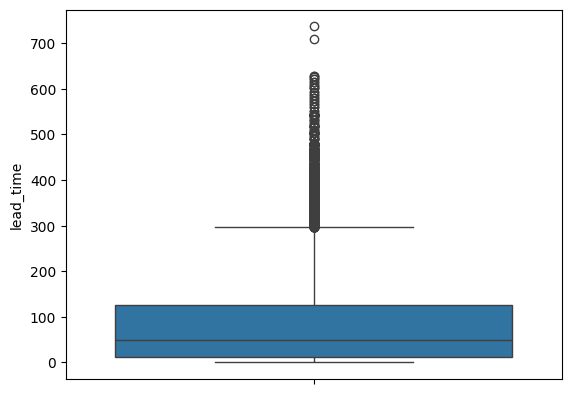

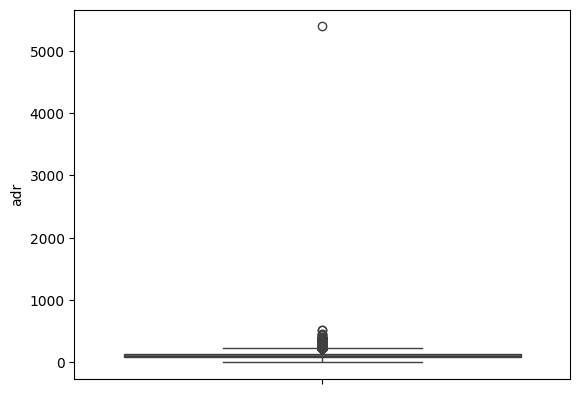

In [32]:
# Checking for outliers
outliers_columns=['lead_time','adr']

for i in outliers_columns:
  if df[i].dtype == 'object':
    continue
  sns.boxplot(df[i])
  plt.show()


In [33]:
# Using Inter Quartile range in skew symmetric curve for removing outliers
for i in outliers_columns:
    #Findng IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining lower and upper limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

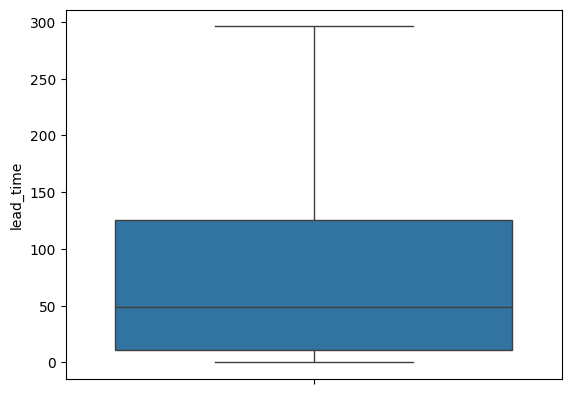

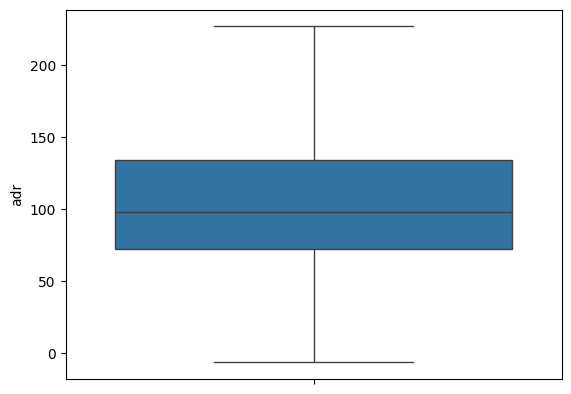

In [34]:
for i in outliers_columns:
  if df[i].dtype == 'object':
    continue
  sns.boxplot(df[i])
  plt.show()

Ouliers in the lead_time and adr variables were removed.

In [35]:
# Adding night stays on week night and weekend night in one variable to 'total_stays'
df['total_stays']=df['stays_in_weekend_nights']+ df['stays_in_week_nights']

# Converting "adults," "children," and "babies" to total_people by adding it
df['total_people']= df['adults']+ df['children']+ df['babies']

# Create a feature for total stay nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Creating 'total_childrens' variable by adding 'chldrens' and 'babies' variables
df['total_childrens']= df['children']+ df['babies']

# Creating 'reserved_room_assigned' variable which describe same room assigned or not
df['reserved_room_assigned']=np.where(df['reserved_room_type']==df['assigned_room_type'], 'yes', 'no')

# Creating 'lead_time_category' from 'lead_time' variale to display category
df['lead_time_category']=np.where(df['lead_time']<=15, 'low',
                                 np.where((df['lead_time']>15) & (df['lead_time']<90), 'medium', 'high'))

# Creating 'guest_category' from variable 'total_people'
df['guest_category']=np.where(df['total_people']==1, 'single',
                                 np.where(df['total_people']==2, 'couple', 'family'))

In [36]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,total_stays,total_people,total_nights,total_childrens,reserved_room_assigned,lead_time_category,guest_category
0,Resort Hotel,Cancelled,296,2021,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,0,2.0,0,0.0,yes,high,couple
1,Resort Hotel,Cancelled,296,2021,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,0,2.0,0,0.0,yes,high,couple
2,Resort Hotel,Cancelled,7,2021,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,1.0,1,0.0,no,low,single
3,Resort Hotel,Cancelled,13,2021,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,1,1.0,1,0.0,yes,low,single
4,Resort Hotel,Cancelled,14,2021,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,2,2.0,2,0.0,yes,low,couple


In [37]:
df.shape

(87396, 38)

In [38]:
# Checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  object        
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  float64       
 11  babies

In [39]:
# Coverting datatype of variables total_people and total_childrens to int64 from float64
df['total_people']=df['total_people'].astype('int64')
df['total_childrens']=df['total_childrens'].astype('int64')

Conclusion:-

1. Load and evaluate data
2. Dataset having 31994 duplicate values and those are successfully removed
3. Null values for the features children, country, agent, and company are 4, 452, 12193, and 82137, respectively.
4. Children, country, agent, and company variables have null values of 0.0046%, 0.5172%, 13.9514%, and 93.9826%, respectively. Variable companies having more than 50% null values
5. From above, children, country, and agent are discrete numerical variables, so replaced null values with modes, and the variable company had null values greater than 50%, so removed it.
6. Ouliers in the lead_time and adr variables were removed.
7. Coverting datatype of variables total_people and total_childrens to int64 from float64
feature  extraction
8. Converting "adults," "children," and "babies" to total_people by adding it
9. Create a feature for total stay nights
10. Creating 'total_childrens' variable by adding 'chldrens' and 'babies' variables
11. Creating 'reserved_room_assigned' variable which describe same room assigned or not
12. Creating 'lead_time_category' from 'lead_time' variale to display category
13. Creating 'guest_category' from variable 'total_people'
14. Adding night stays on week night and weekend night in one variable to 'total_stays'

In [40]:
# For EDA Evaluate unique value in each column
df.nunique()

,0
hotel,2
is_canceled,2
lead_time,297
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


## EDA

Text(0.5, 1.0, 'popularity of hotel type')

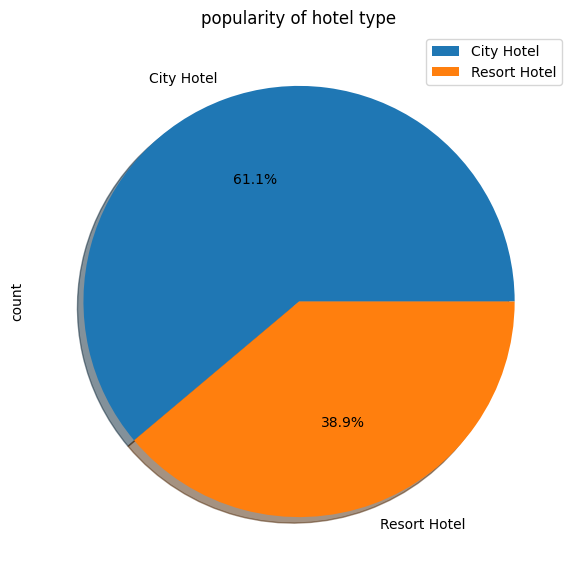

In [178]:
# popularity of hotel type

plt.figure(figsize=(13,7))
df['hotel'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, shadow=True)
plt.title('popularity of hotel type')

Customers Prefer City hotel(61.1) more then Resort Hotel(38.9)

Text(0.5, 1.0, 'canceled bookings %')

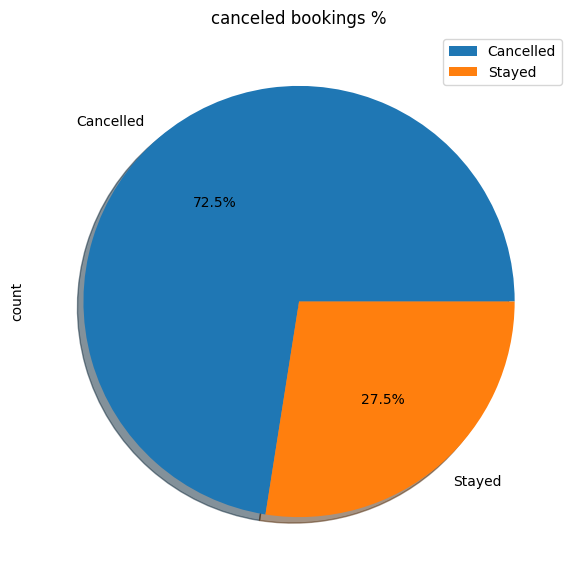

In [179]:
# canceled bookings

plt.figure(figsize=(13,7))
df['is_canceled'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, shadow=True)
plt.title('canceled bookings %')

Maximum bookings get cancelled which is about 72.5% of all bookings.

Text(0.5, 1.0, '% market segment')

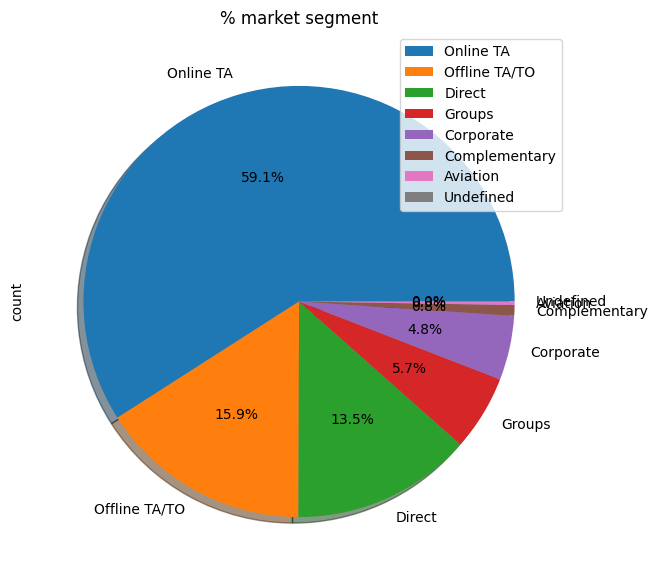

In [180]:
# market segment

plt.figure(figsize=(13,7))
df['market_segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, shadow=True)
plt.title('% market segment')

Get 59.1% customers from online TA marcket segment which is maximum.

Text(0.5, 1.0, '% customer type')

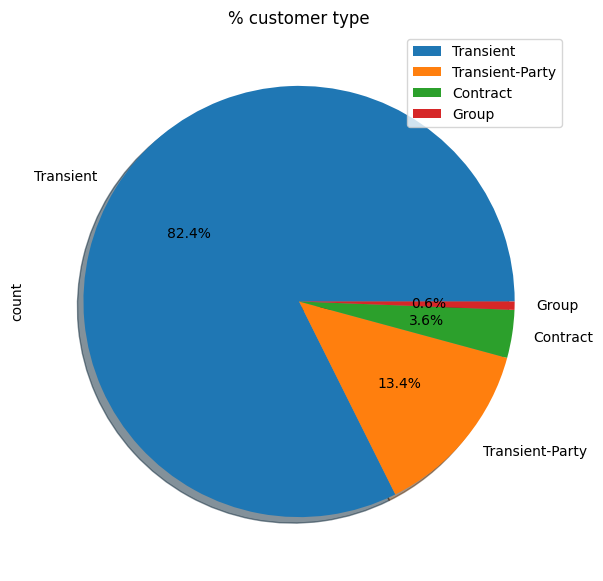

In [181]:
# customer type
plt.figure(figsize=(13,7))
df['customer_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, shadow=True)
plt.title('% customer type')

82.4% customers are Transient type.

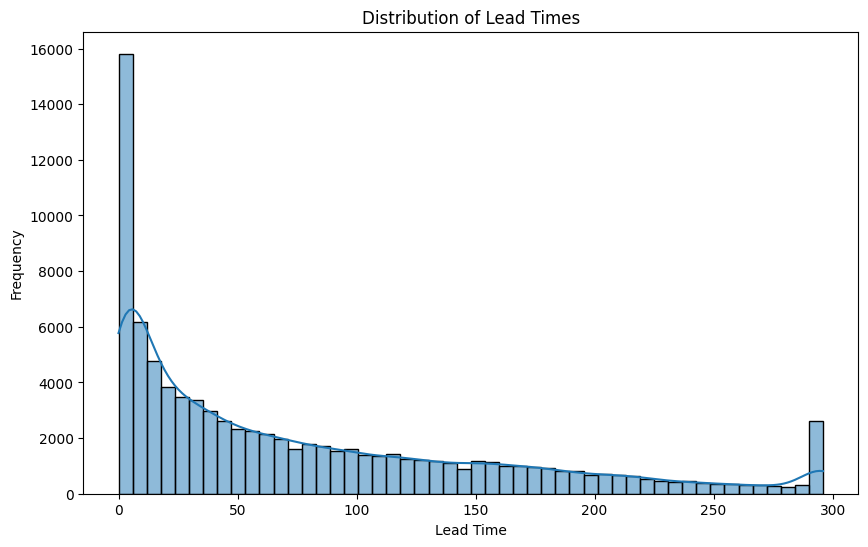

In [43]:
# Distribution of lead times
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

50 Lead time frequency in majority of bookings.

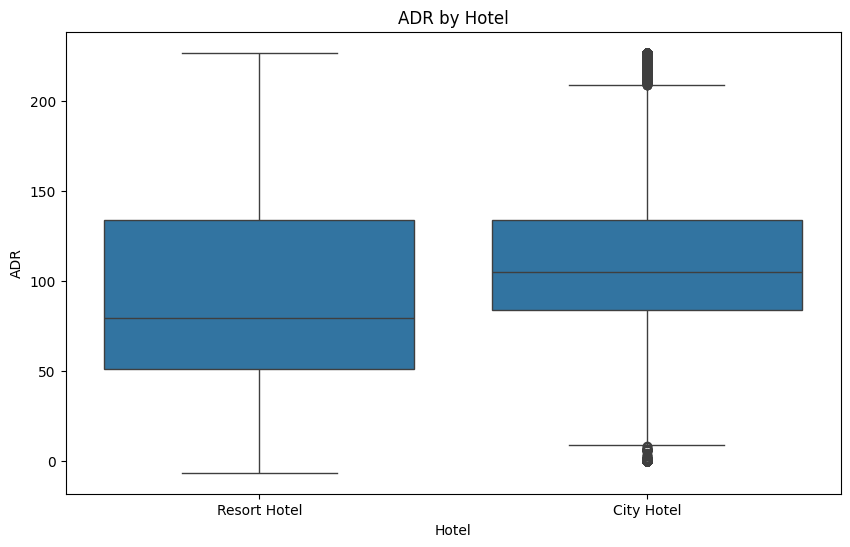

In [44]:
# Average Daily Rate (ADR) by hotel
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('ADR by Hotel')
plt.xlabel('Hotel')
plt.ylabel('ADR')
plt.show()

Verage ADR between 50 to 150

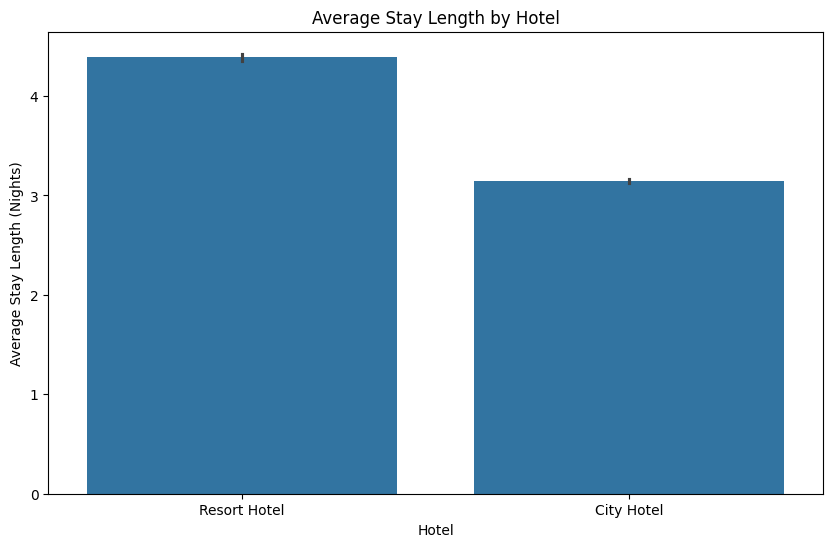

In [46]:
# Average stay length by hotel
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='total_nights', data=df)
plt.title('Average Stay Length by Hotel')
plt.xlabel('Hotel')
plt.ylabel('Average Stay Length (Nights)')
plt.show()

Booking Duration is more in resort then City hotels.

In [47]:
df['canceled'] = df['is_canceled'].apply(lambda x: 1 if x == 'Cancelled' else 0)

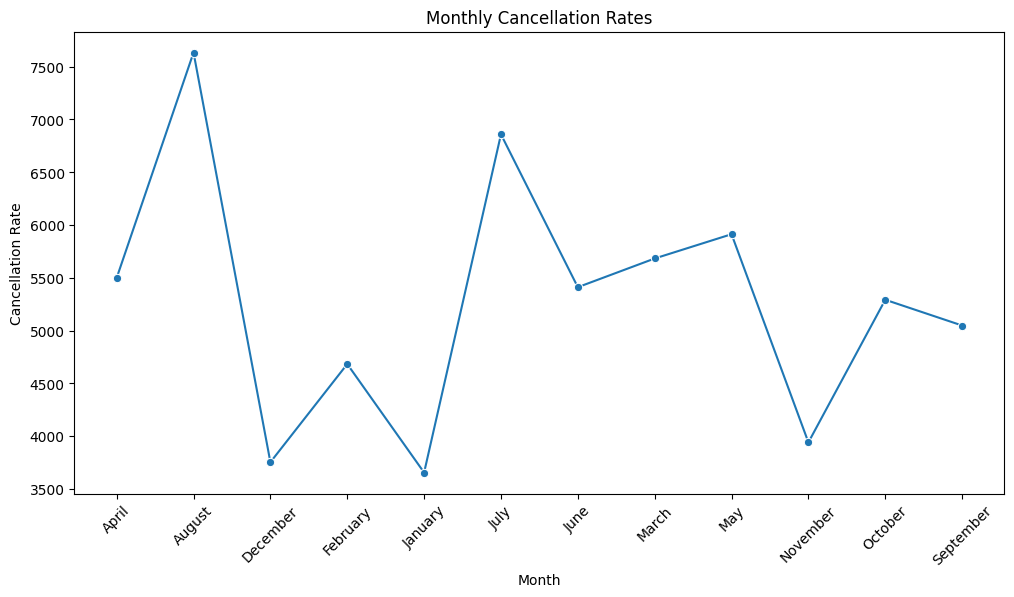

In [48]:
# Booking cancellations by month

monthly_cancellations = df.groupby('arrival_date_month')['canceled'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='canceled', data=monthly_cancellations, marker='o')
plt.title('Monthly Cancellation Rates')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

Cancellation rate is low between november to february.

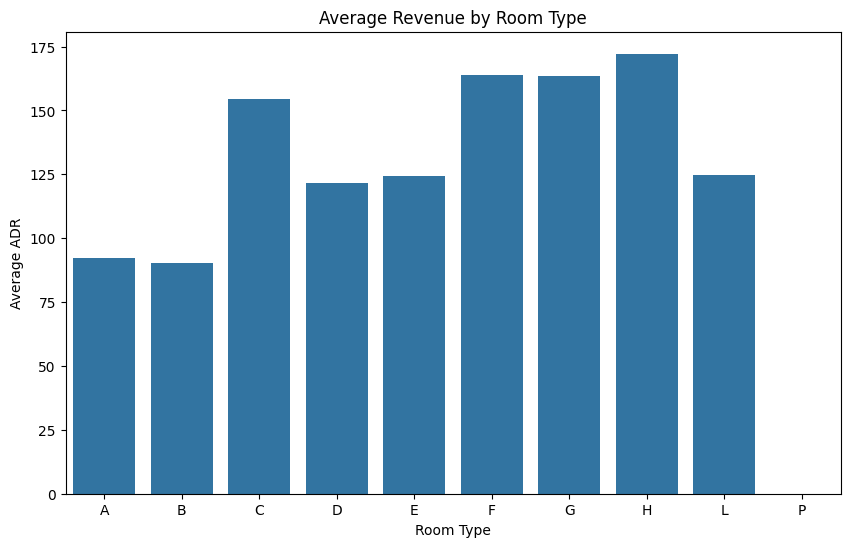

In [49]:
# Revenue by room type
plt.figure(figsize=(10, 6))
room_type_revenue = df.groupby('reserved_room_type')['adr'].mean().reset_index()
sns.barplot(x='reserved_room_type', y='adr', data=room_type_revenue)
plt.title('Average Revenue by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average ADR')
plt.show()

Verage ADR rate is more of room type C, F, G, H.

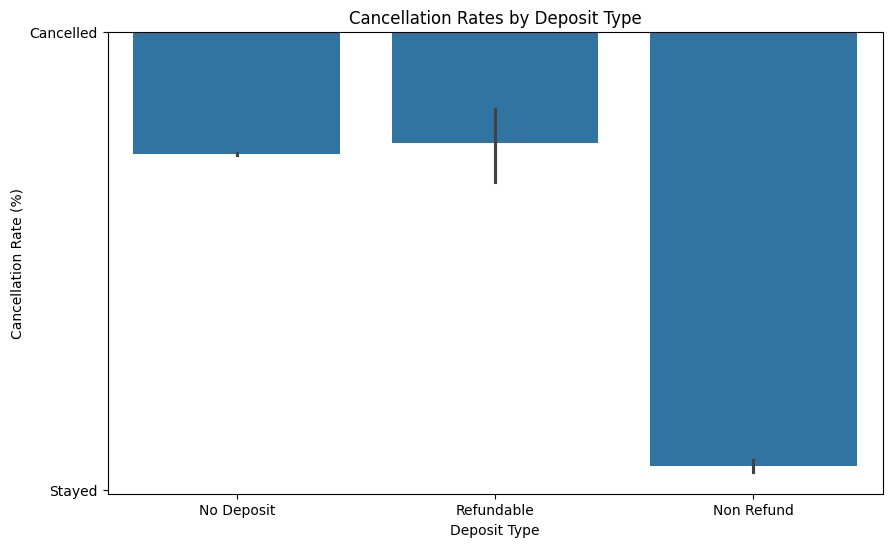

In [50]:
# Cancellation rates by deposit type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='deposit_type', y='is_canceled')
plt.title('Cancellation Rates by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()

Maximum cancellation are in non refund category.

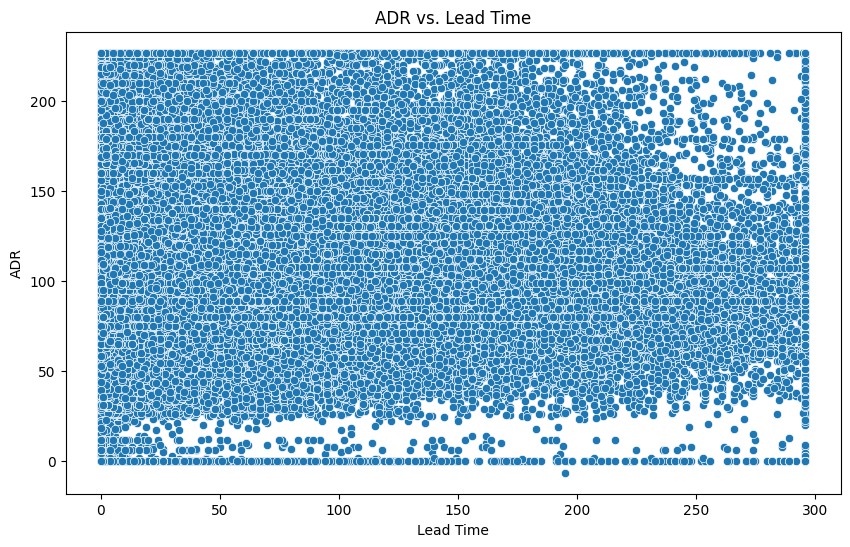

In [53]:
# ADR vs. lead time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lead_time', y='adr', data=df)
plt.title('ADR vs. Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('ADR')
plt.show()

No corelation in ADR and Lead time.

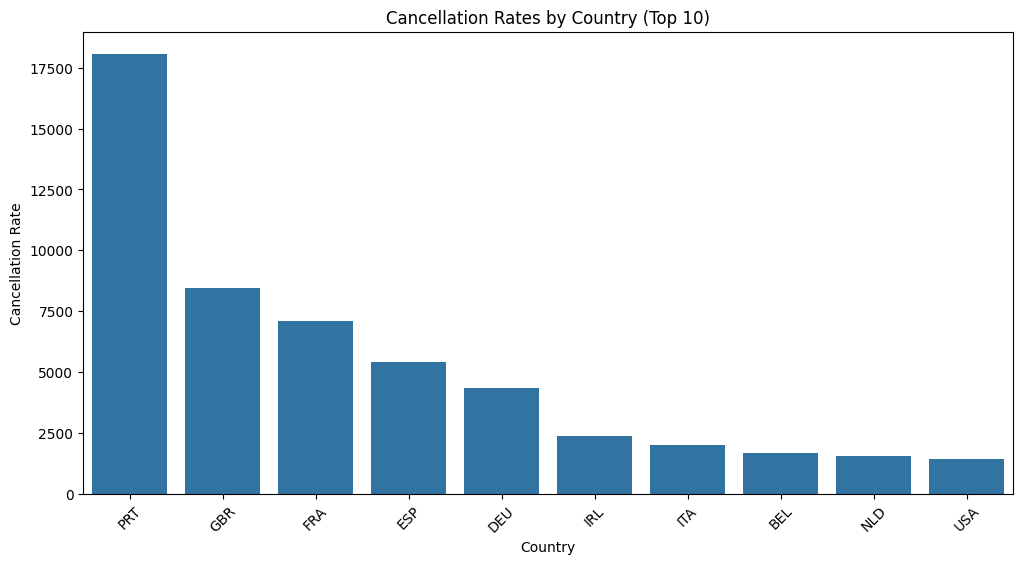

In [54]:
# Cancellations by country
plt.figure(figsize=(12, 6))
country_cancellations = df.groupby('country')['canceled'].sum().reset_index()
country_cancellations = country_cancellations.sort_values(by='canceled', ascending=False).head(10)
sns.barplot(x='country', y='canceled', data=country_cancellations)
plt.title('Cancellation Rates by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

PRT, GBR, FRA these Country has maximum cancellation rate.

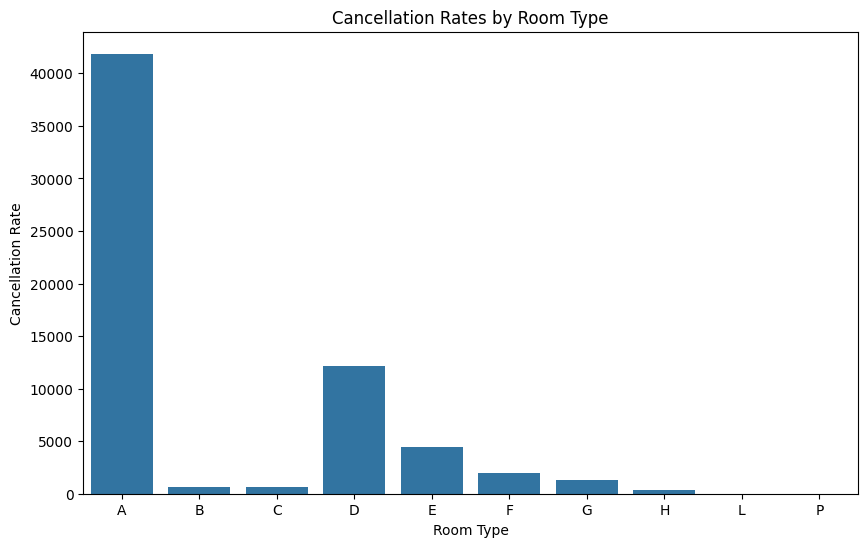

In [55]:
# Cancellations by room type
plt.figure(figsize=(10, 6))
room_type_cancellations = df.groupby('reserved_room_type')['canceled'].sum().reset_index()
sns.barplot(x='reserved_room_type', y='canceled', data=room_type_cancellations)
plt.title('Cancellation Rates by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Cancellation Rate')
plt.show()

A and D Rooms have maximum cancellation rate.

In [57]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

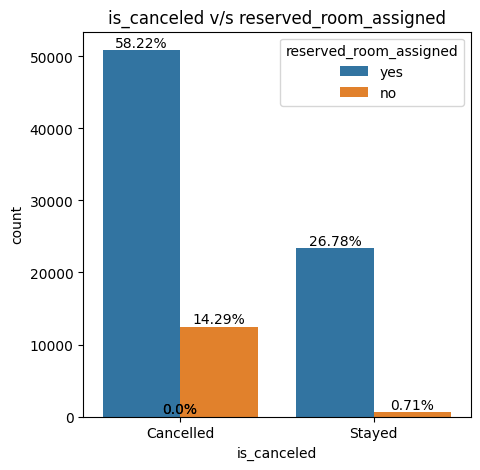

In [60]:
# Plotting count plot for is_canceled in terms of reserved_room_assigned
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.countplot(x=df['is_canceled'], hue=df['reserved_room_assigned'])
ax.set_title('is_canceled v/s reserved_room_assigned')
annot_percent(plot)
plt.show()

Majority of booking cancelled regardless of assign reserved room.

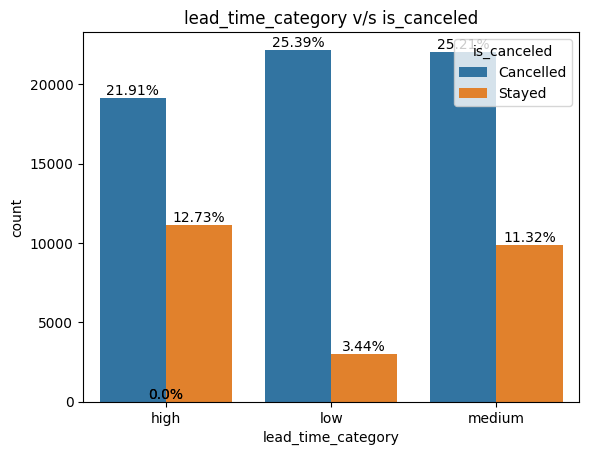

In [61]:
# Plotting count plot for lead_time_category in terms of is_canceled

plot=plt.subplot(111)
ax=sns.countplot(x=df['lead_time_category'], hue=df['is_canceled'])
ax.set_title('lead_time_category v/s is_canceled')
annot_percent(plot)
plt.show()

Customer more likely to stay when lead time is medium to high.

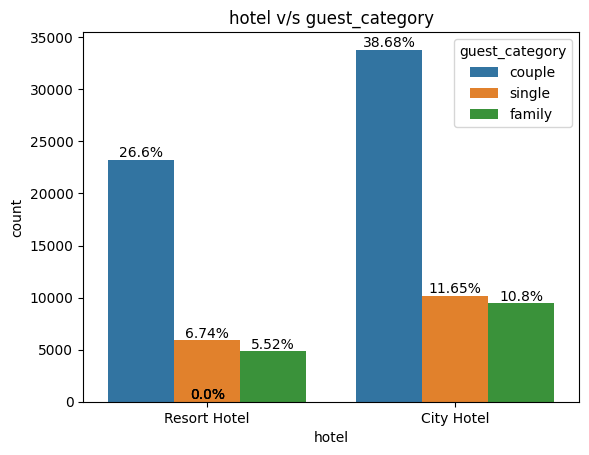

In [62]:
# Plotting count plot for hotel

plot=plt.subplot(111)
ax=sns.countplot(x=df['hotel'], hue=df['guest_category'])
ax.set_title('hotel v/s guest_category')
annot_percent(plot)
plt.show()

City hotels Prefer by majority of customer category.

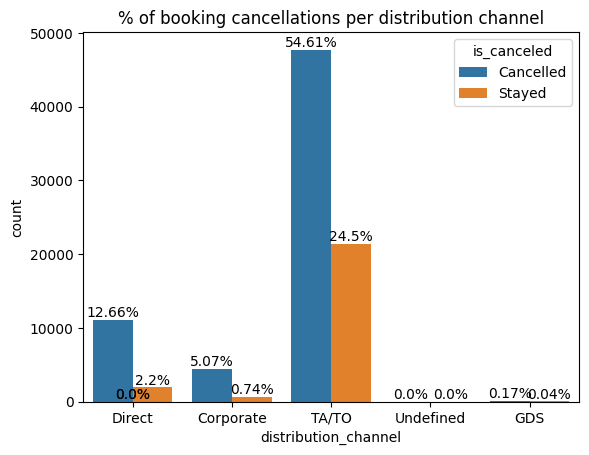

In [64]:
# Plotting a count plot for distribution channels in terms of the number of booking cancellations

plot=plt.subplot(111)
ax=sns.countplot(x=df['distribution_channel'], hue=df['is_canceled'])
ax.set_title('% of booking cancellations per distribution channel')
annot_percent(plot)
plt.show()

The majority of canceled bookings were made through the TA/TO distribution channel. Bookings made through the Direct, Corporate, and GDS distribution channels are unlikely to be canceled.

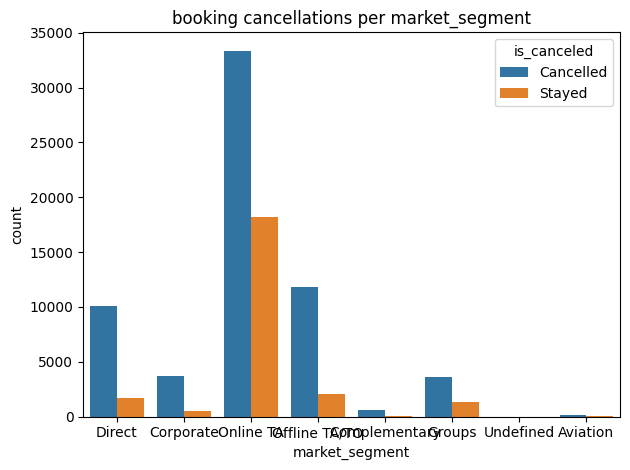

In [65]:
# Plotting count plot for market segment

ax=sns.countplot(x=df['market_segment'], hue=df['is_canceled'])
ax.set_title('booking cancellations per market_segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Maximum booking cansilled in online ta marcket segment.

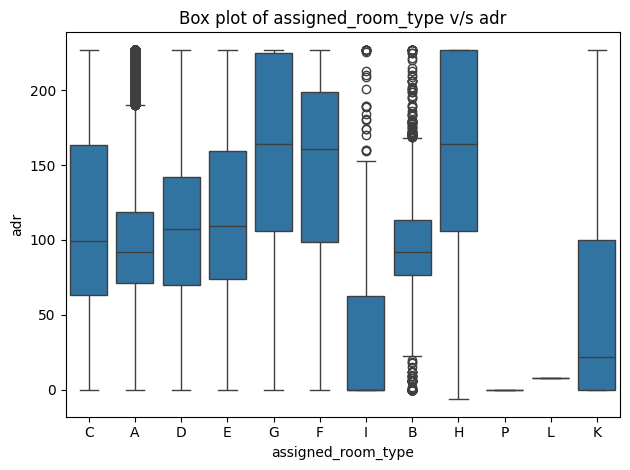

In [66]:
# Plotting box plot assigned_room_type against ADR

ax=sns.boxplot(x=df['assigned_room_type'], y=df['adr'])
ax.set_title('Box plot of assigned_room_type v/s adr')
plt.tight_layout()
plt.show()

Room types G, followed by H, generate high ADR.

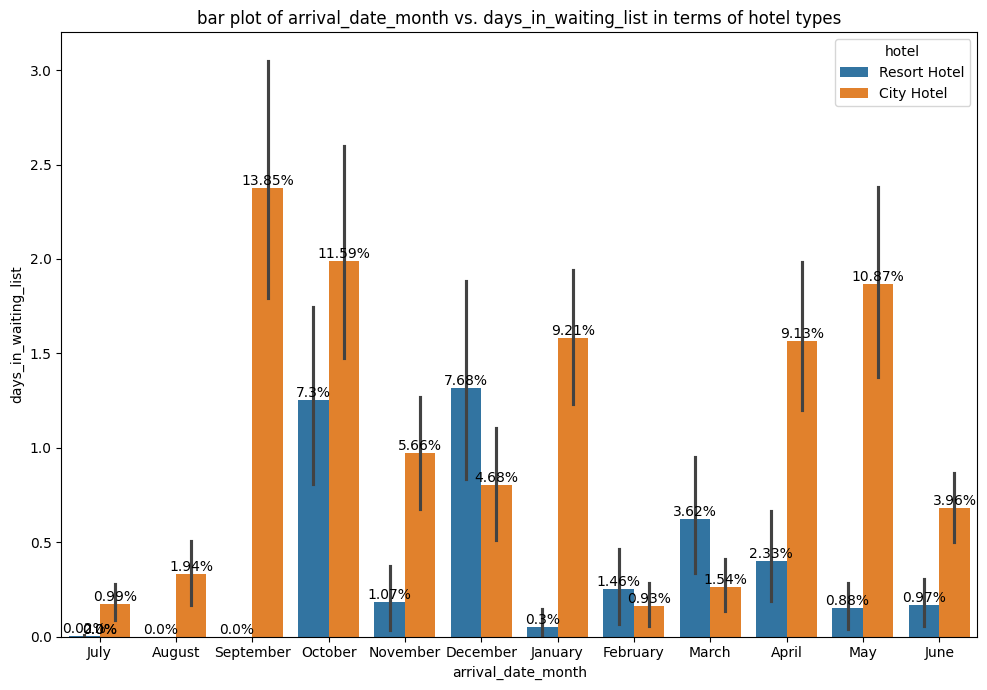

In [68]:
# Bar plot for arrival month of customer against waiting days for bookings

plt.figure(figsize=(10,7))
plot=plt.subplot(111)
ax=sns.barplot(x=df['arrival_date_month'], y=df['days_in_waiting_list'], hue=df['hotel'])
ax.set_title('bar plot of arrival_date_month vs. days_in_waiting_list in terms of hotel types')
annot_percent(plot)
plt.tight_layout()
plt.show()

City hotels have maximum booking in may, sep, oct and resort have maximum booking in oct, dec.

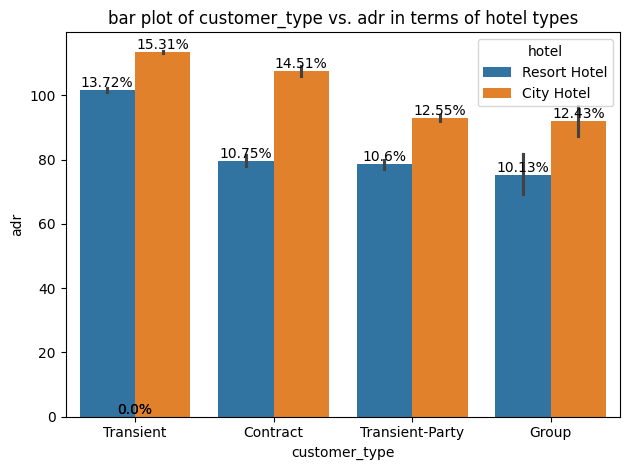

In [69]:
# Plotting bar plot for diffrent customers type against ADR

plot=plt.subplot(1,1,1)
ax=sns.barplot(x=df['customer_type'], y=df['adr'], hue=df['hotel'])
ax.set_title('bar plot of customer_type vs. adr in terms of hotel types')
annot_percent(plot)
plt.tight_layout()
plt.show()

City hotels generate more revenue (54.86%) than resort hotels (45.14%). Transient customers who book rooms for a short period of time generate more revenue than other types of customers.

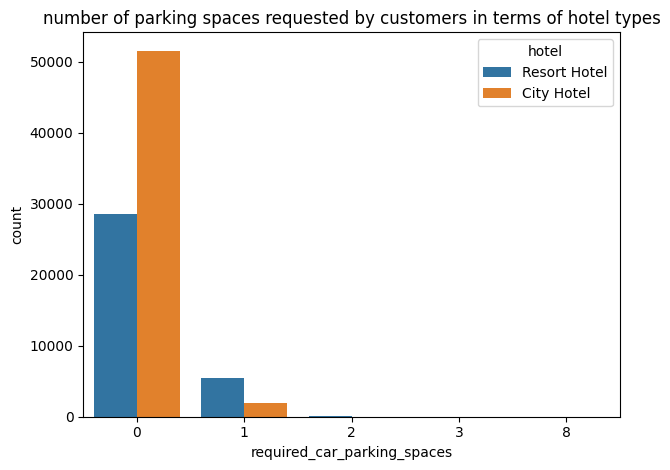

In [70]:
# Plotting count plot for number of requested parking spaces in terms of hotel

ax=sns.countplot(x=df['required_car_parking_spaces'], hue=df['hotel'])
ax.set_title('number of parking spaces requested by customers in terms of hotel types')
plt.tight_layout()
plt.show()

Most of the customers dont want parcking space and very few want 1 parking.

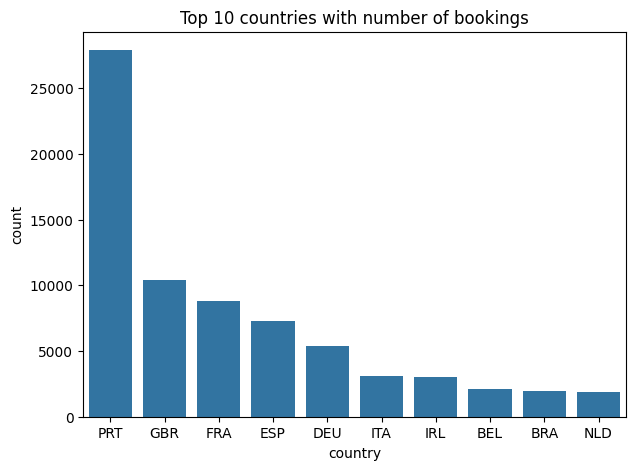

In [74]:
# Creating country_df which counts number of bookings by each country
country_df = pd.DataFrame(df['country'].value_counts()).reset_index()

# Plotting point plot for country with number of bookings
plt.figure(figsize=(7,5))
ax=sns.barplot(x=country_df['country'].head(10), y=country_df['count'])
ax.set_title('Top 10 countries with number of bookings')
plt.show()

PRT, GBR, FRA top 3 country by maximum booking

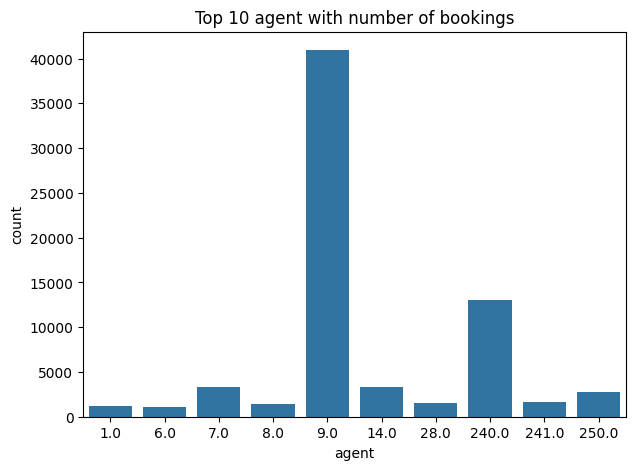

In [75]:
# Creating agent_df which counts number of bookings by each agent
agent_df = pd.DataFrame(df['agent'].value_counts()).reset_index()

# Plotting point plot for agent with number of bookings
plt.figure(figsize=(7,5))
ax=sns.barplot(x=agent_df['agent'].head(10), y=agent_df['count'])
ax.set_title('Top 10 agent with number of bookings')
plt.show()

 Agent nummber 9, 240 made most number of bookings.

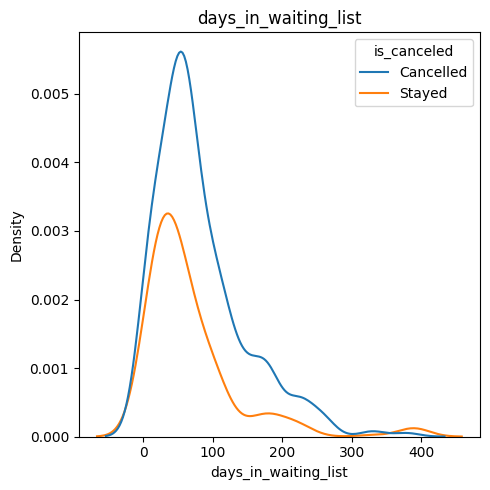

In [76]:
#Selecting bookings with non zero waiting time
waiting_time=df[df['days_in_waiting_list']!=0]

#ploting graph

plt.figure(figsize=(5,5))
ax=sns.kdeplot(x=waiting_time['days_in_waiting_list'], hue=waiting_time['is_canceled'])
ax.set_title('days_in_waiting_list')
plt.tight_layout()
plt.show()

Cancellation is not related to waiting days.

Pair Plot

<Figure size 1000x800 with 0 Axes>

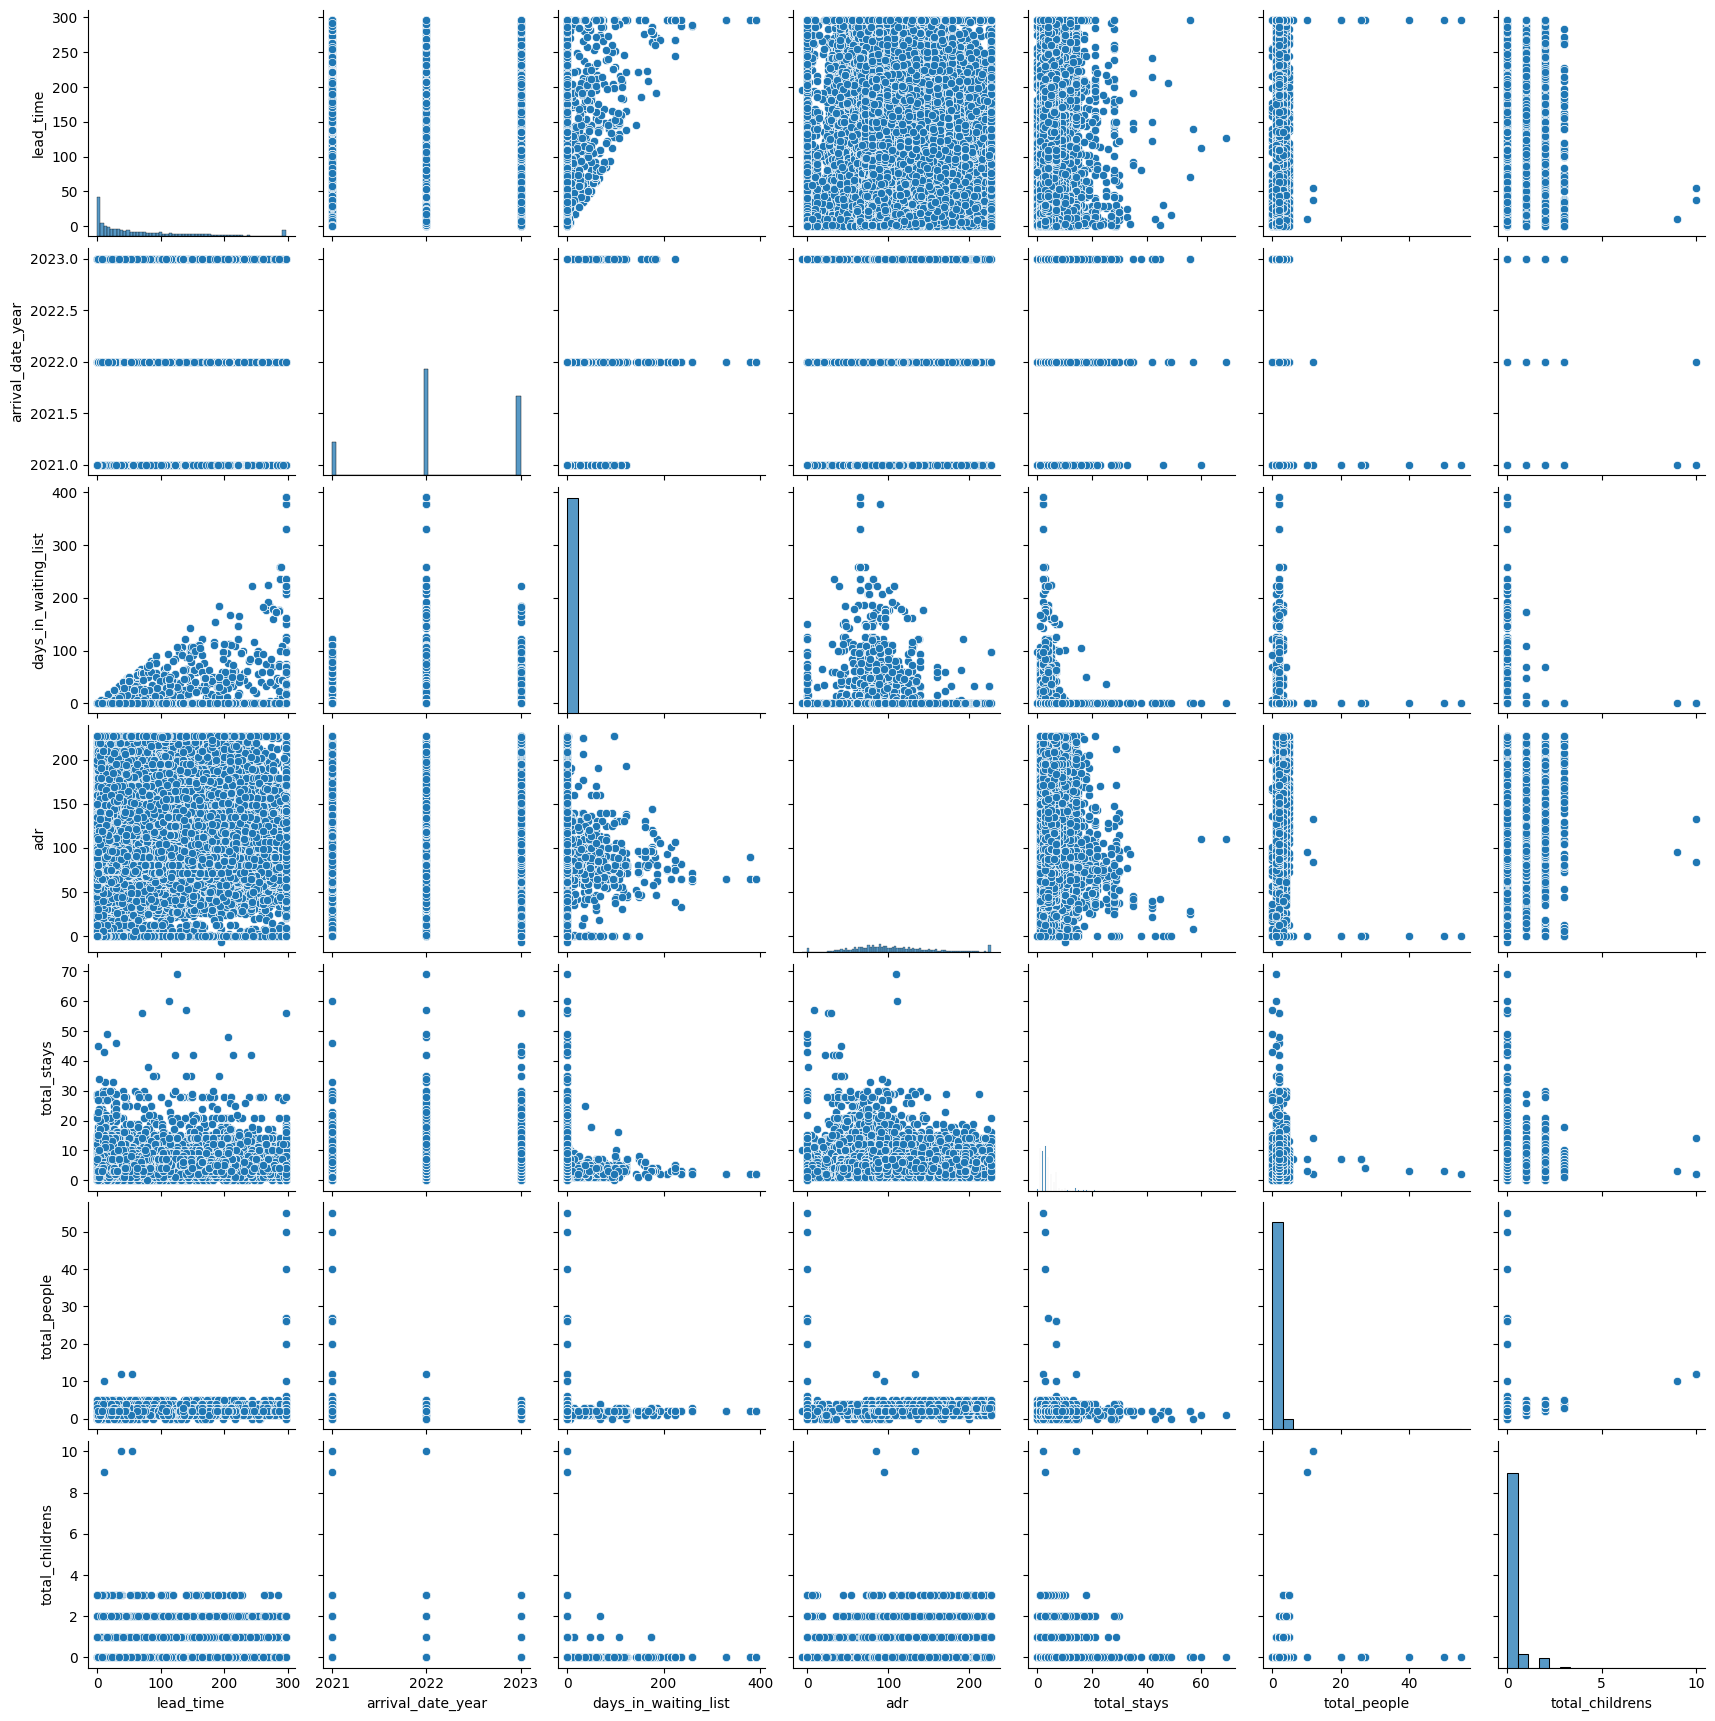

In [77]:
# Creating new dataset
new_df2=df[['hotel','is_canceled','lead_time','arrival_date_year','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type',
       'assigned_room_type','deposit_type','days_in_waiting_list', 'customer_type', 'adr','total_stays',
       'total_people', 'total_childrens', 'reserved_room_assigned',
       'guest_category', 'lead_time_category']]

# Plotting pair plot for dataset
plt.figure(figsize=(10,8))
ax=sns.pairplot(new_df2)
plt.show()

Conclusion:-

1. Customers Prefer City hotel(61.1) more then Resort Hotel(38.9)
2. Maximum bookings get cancelled which is about 72.5% of all bookings.
3. Get 59.1% customers from online TA marcket segment which is maximum.
4. 82.4% customers are Transient type.
5. 50 Lead time frequency in majority of bookings.
6. Verage ADR between 50 to 150
7. Booking Duration is more in resort then City hotels.
8. Cancellation rate is low between november to february.
9. Verage ADR rate is more of room type C, F, G, H.
10. Maximum cancellation are in non refund category.
11. No corelation in ADR and Lead time.
12. PRT, GBR, FRA these Country has maximum cancellation rate.
13. A and D Rooms have maximum cancellation rate.
14. Majority of booking cancelled regardless of assign reserved room.
15. Customer more likely to stay when lead time is medium to high.
16. City hotels Prefer by majority of customer category.
17. The majority of canceled bookings were made through the TA/TO distribution channel. Bookings made through the Direct, Corporate, and GDS distribution channels are unlikely to be canceled.
18. Maximum booking cansilled in online ta marcket segment.
19. Room types G, followed by H, generate high ADR.
20. City hotels have maximum booking in may, sep, oct and resort have maximum booking in oct, dec.
21. City hotels generate more revenue (54.86%) than resort hotels (45.14%). Transient customers who book rooms for a short period of time generate more revenue than other types of customers.
22. Most of the customers dont want parcking space and very few want 1 parking.
23. PRT, GBR, FRA top 3 country by maximum booking
24. Agent nummber 9, 240 made most number of bookings.
25. Cancellation is not related to waiting days.

# Hypothesis Testing

1. Let's perform hypothesis testing to determine if there's a significant difference in ADR between stayed and canceled bookings.

H0 = no significant difference in ADR between stayed and canceled bookings.

H1 = there is a significant difference in ADR between stayed and canceled bookings.

In [78]:
from scipy.stats import ttest_ind

# Split the data into stayed and canceled
stayed = df[df['canceled'] == 0]['adr']
canceled = df[df['canceled'] == 1]['adr']

# Perform t-test
t_stat, p_value = ttest_ind(stayed, canceled, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in ADR between stayed and canceled bookings.")
else:
    print("There is no significant difference in ADR between stayed and canceled bookings.")

T-statistic: 41.0968713796286, P-value: 0.0
There is a significant difference in ADR between stayed and canceled bookings.


Hypothesis Testing: Effect of Booking Channel on ADR

H0 = The average ADR is the same for customers who book through online channels and offline channels.

H1 = The average ADR is different for customers who book through online channels compared to offline channels.

In [79]:
# Group bookings by online and offline booking channels
online_channels = ['Online TA', 'TA/TO']
offline_channels = ['Corporate', 'Direct']

adr_online = df[df['market_segment'].isin(online_channels)]['adr']
adr_offline = df[df['market_segment'].isin(offline_channels)]['adr']

# Perform an independent t-test between online and offline channels
t_stat, p_value = ttest_ind(adr_online, adr_offline)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion based on p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ADR between online and offline booking channels.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in ADR between online and offline booking channels.")

T-statistic: 33.67107147222269
P-value: 1.697738865355213e-246
Reject the null hypothesis: There is a significant difference in ADR between online and offline booking channels.


# ML Models

# Customer Segment Analysis:

In [163]:
df1 = df

In [165]:
columns_to_drop = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'distribution_channel', 'assigned_room_type', 'booking_changes', 'agent', 'reservation_status_date']
data_cleaned = df1.drop(columns=columns_to_drop)

In [166]:
data_cleaned.head()

,hotel,is_canceled,lead_time,stays_in_week_nights,adults,children,babies,meal,country,market_segment,...,total_of_special_requests,reservation_status,total_stays,total_people,total_nights,total_childrens,reserved_room_assigned,lead_time_category,guest_category,canceled
0,Resort Hotel,Cancelled,296,0,2,0.0,0,BB,PRT,Direct,...,0,Check-Out,0,2,0,0,yes,high,couple,1
1,Resort Hotel,Cancelled,296,0,2,0.0,0,BB,PRT,Direct,...,0,Check-Out,0,2,0,0,yes,high,couple,1
2,Resort Hotel,Cancelled,7,1,1,0.0,0,BB,GBR,Direct,...,0,Check-Out,1,1,1,0,no,low,single,1
3,Resort Hotel,Cancelled,13,1,1,0.0,0,BB,GBR,Corporate,...,0,Check-Out,1,1,1,0,yes,low,single,1
4,Resort Hotel,Cancelled,14,2,2,0.0,0,BB,GBR,Online TA,...,1,Check-Out,2,2,2,0,yes,low,couple,1


In [167]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  object 
 2   lead_time                       87396 non-null  int64  
 3   stays_in_week_nights            87396 non-null  int64  
 4   adults                          87396 non-null  int64  
 5   children                        87396 non-null  float64
 6   babies                          87396 non-null  int64  
 7   meal                            87396 non-null  object 
 8   country                         87396 non-null  object 
 9   market_segment                  87396 non-null  object 
 10  is_repeated_guest               87396 non-null  int64  
 11  previous_cancellations          87396 non-null  int64  
 12  previous_bookings_not_canceled  8739

In [168]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

# encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Loop through all columns and apply LabelEncoder to the categorical columns
label_encoder = LabelEncoder()
for col in data_cleaned.select_dtypes(include=['object', 'category']).columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

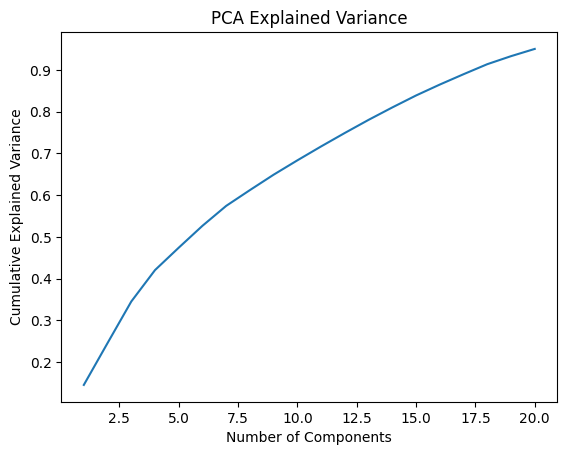

In [169]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
data_pca = pca.fit_transform(data_scaled)

# Plot explained variance to determine the number of components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [170]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 10 features (based on their contribution to clustering)
selector = SelectKBest(f_classif, k=10)
data_selected = selector.fit_transform(data_pca, df1['canceled'])

# Get selected feature indices
selected_features = selector.get_support(indices=True)
selected_feature_names = data_cleaned.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_week_nights', 'adults',
       'babies', 'meal', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'required_car_parking_spaces'],
      dtype='object')


Model 1: Kmean

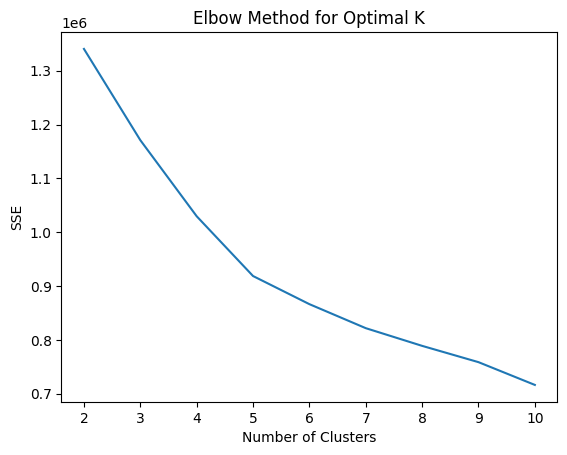

KMeans Silhouette Score: 0.23768364941377257


In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Find the optimal number of clusters using the Elbow Method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_selected)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(2, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit KMeans with the optimal number of clusters (from the Elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data_selected)

# Evaluate KMeans clustering
print(f"KMeans Silhouette Score: {silhouette_score(data_selected, kmeans_labels)}")

In [172]:
# Fit KMeans with the optimal number of clusters (from the Elbow curve)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(data_selected)

# Evaluate KMeans clustering
print(f"KMeans Silhouette Score: {silhouette_score(data_selected, kmeans_labels)}")

KMeans Silhouette Score: 0.24094554749754588


Model 2: Hierarchical Clustering

In [173]:
data_sample = pd.DataFrame(data_selected).sample(1000, random_state=42)

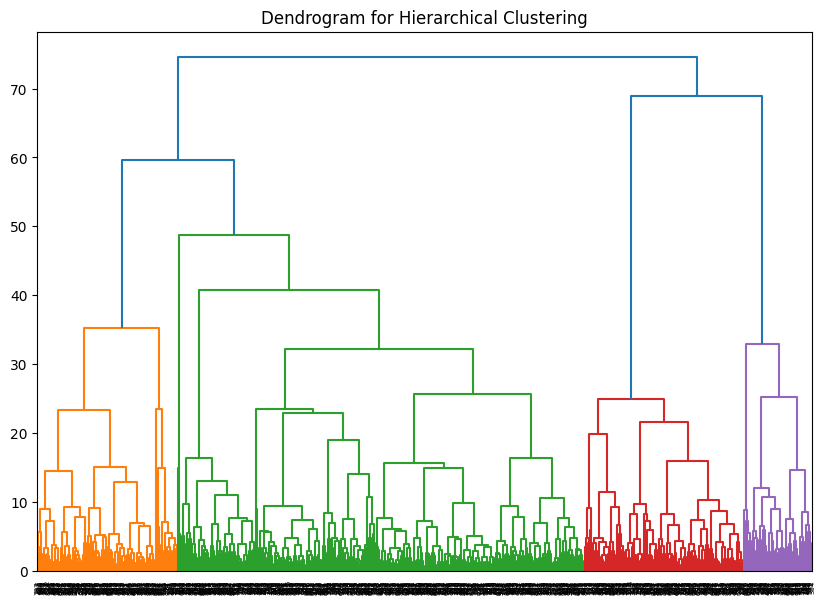

Hierarchical Clustering Silhouette Score: 0.22975547278344202


In [174]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering with a dendrogram
linked = linkage(data_sample, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Fit Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(data_sample)

# Evaluate Hierarchical clustering
print(f"Hierarchical Clustering Silhouette Score: {silhouette_score(data_sample, hc_labels)}")

Model 3: Density-Based Clustering

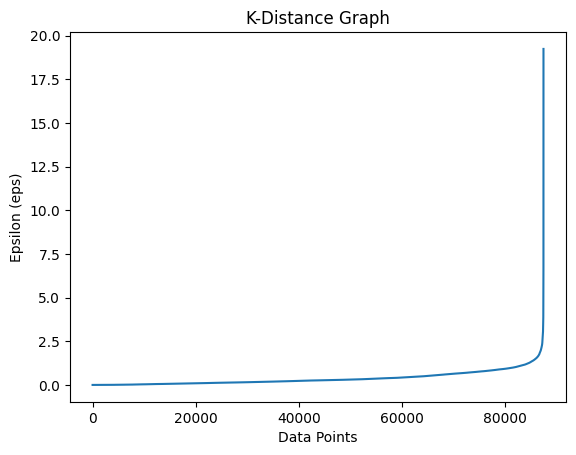

DBSCAN Silhouette Score: -0.3086140469889105


In [175]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Use NearestNeighbors to find the optimal epsilon (eps) for DBSCAN
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(data_selected)
distances, indices = neighbors_fit.kneighbors(data_selected)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot the K-Distance Graph to find the elbow point (best eps)
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Epsilon (eps)')
plt.show()

# Fit DBSCAN with estimated eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Use the value of eps from the graph
dbscan_labels = dbscan.fit_predict(data_selected)

# Evaluate DBSCAN
print(f"DBSCAN Silhouette Score: {silhouette_score(data_selected, dbscan_labels)}")

Compare and Choose the Best Model

In [177]:
# Comparing silhouette scores for all three models
print(f"KMeans Silhouette Score: {silhouette_score(data_selected, kmeans_labels)}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_score(data_sample, hc_labels)}")
print(f"DBSCAN Silhouette Score: {silhouette_score(data_selected, dbscan_labels)}")

KMeans Silhouette Score: 0.24094554749754588
Hierarchical Clustering Silhouette Score: 0.22975547278344202
DBSCAN Silhouette Score: -0.3086140469889105


Save the Best Model Using Pickle

Kmeans clustring model perform best in all 3 models

In [94]:
import pickle

# Save the best model (assuming KMeans is the best in this example)
with open('best_customer_segmentation_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Pricing Drivers Identification

Data Preprocessing

In [95]:
df2 = df

In [96]:
# Drop irrelevant columns
columns_to_drop = ['is_canceled', 'reservation_status_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'market_segment', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'assigned_room_type', 'agent']
data_cleaned = df2.drop(columns=columns_to_drop)
data_cleaned.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,...,total_of_special_requests,reservation_status,total_stays,total_people,total_nights,total_childrens,reserved_room_assigned,lead_time_category,guest_category,canceled
0,Resort Hotel,296,0,0,2,0.0,0,BB,PRT,Direct,...,0,Check-Out,0,2,0,0,yes,high,couple,1
1,Resort Hotel,296,0,0,2,0.0,0,BB,PRT,Direct,...,0,Check-Out,0,2,0,0,yes,high,couple,1
2,Resort Hotel,7,0,1,1,0.0,0,BB,GBR,Direct,...,0,Check-Out,1,1,1,0,no,low,single,1
3,Resort Hotel,13,0,1,1,0.0,0,BB,GBR,Corporate,...,0,Check-Out,1,1,1,0,yes,low,single,1
4,Resort Hotel,14,0,2,2,0.0,0,BB,GBR,TA/TO,...,1,Check-Out,2,2,2,0,yes,low,couple,1


In [97]:
# Handle categorical variables
categorical_features = data_cleaned.select_dtypes(include=['object']).columns
for feature in categorical_features:
    data_cleaned[feature] = LabelEncoder().fit_transform(data_cleaned[feature])

In [98]:
# Define features and target
X = data_cleaned.drop('adr', axis=1)
y = data_cleaned['adr']

In [99]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature Selection

We'll use SelectKBest to choose the top features that have the highest correlation with the target variable.

In [100]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top features
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['adults', 'children', 'is_repeated_guest', 'reserved_room_type',
       'total_of_special_requests', 'reservation_status', 'total_people',
       'total_childrens', 'reserved_room_assigned', 'canceled'],
      dtype='object')


Model Building and Hyperparameter Tuning

Model 1: Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Initialize and fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_selected, y)

# Evaluate model
print("Linear Regression Coefficients:", lin_reg.coef_)

Linear Regression Coefficients: [-6.84090250e+13  1.01875000e+01 -5.05664062e+00  1.29218750e+01
  5.68359375e+00 -2.01074219e+00  8.67335767e+13 -5.15090987e+13
  4.80371094e+00 -2.20898438e+00]


Model 2: Ridge Regression

In [111]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Ridge Regression
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='r2', cv=5, n_jobs=-1)

# Fit Ridge model
grid_search_ridge.fit(X_selected, y)
print("Best Parameters for Ridge Regression:", grid_search_ridge.best_params_)
print("Best Ridge Model Score:", grid_search_ridge.best_score_)

Best Parameters for Ridge Regression: {'alpha': 100}
Best Ridge Model Score: 0.22455816024132175


Model 3: Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='r2', cv=5, n_jobs=-1)

# Fit Random Forest model
grid_search_rf.fit(X_selected, y)
print("Best Parameters for Random Forest Regressor:", grid_search_rf.best_params_)
print("Best Random Forest Model Score:", grid_search_rf.best_score_)

Best Parameters for Random Forest Regressor: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Model Score: 0.2550265271454798


Model Evaluation

In [113]:
print("Linear Regression R^2 Score:", lin_reg.score(X_selected, y))
print("Best Ridge Regression R^2 Score:", grid_search_ridge.best_score_)
print("Best Random Forest Regressor R^2 Score:", grid_search_rf.best_score_)

Linear Regression R^2 Score: 0.2825858434204397
Best Ridge Regression R^2 Score: 0.22455816024132175
Best Random Forest Regressor R^2 Score: 0.2550265271454798


Lenier regression perform best in all 3 models

In [115]:
# Save the best model (Random Forest in this example)
with open('best_pricing_drivers_model.pkl', 'wb') as file:
    pickle.dump(lin_reg, file)

# Pricing Strategy Development:

Data Preprocessing

In [116]:
df3 = df

In [117]:
# Drop irrelevant columns

columns_to_drop = ['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'market_segment', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'assigned_room_type', 'agent']
data_cleaned = df3.drop(columns=columns_to_drop)

In [118]:
# Handle categorical variables
categorical_features = data_cleaned.select_dtypes(include=['object', 'datetime']).columns
for feature in categorical_features:
    data_cleaned[feature] = LabelEncoder().fit_transform(data_cleaned[feature])

In [119]:
# Normalize the data
scaler = StandardScaler()
X = data_cleaned.drop('adr', axis=1)  # 'adr' is the target (Average Daily Rate)
y = data_cleaned['adr']
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

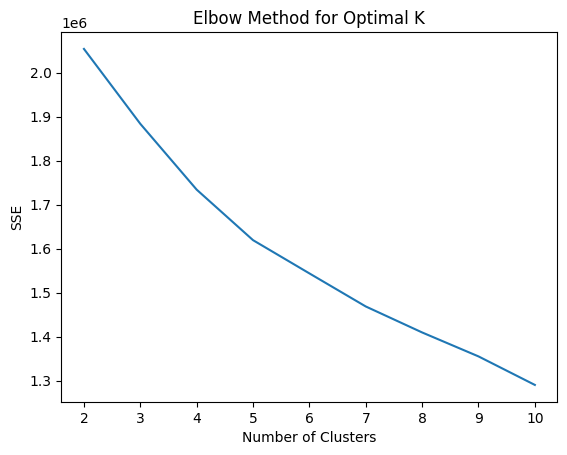

In [120]:
# Find the optimal number of clusters using the Elbow Method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(2, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

Customer Segmentation Using K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


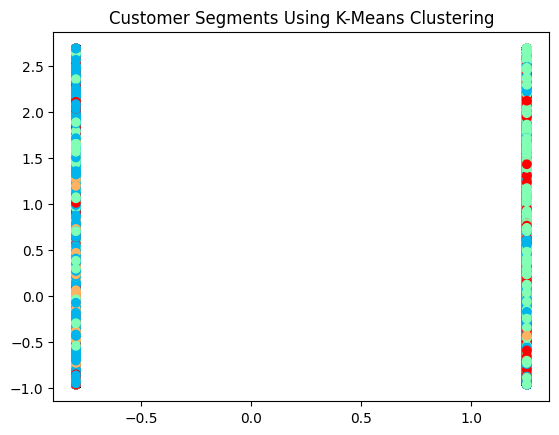

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the clusters as a new column to the dataset
data_cleaned['Customer_Segment'] = clusters

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow')
plt.title('Customer Segments Using K-Means Clustering')
plt.show()

Feature Selection for Demand Forecasting

In [122]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top features for demand forecasting
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features for Demand Forecasting:", selected_features)

Selected Features for Demand Forecasting: Index(['adults', 'children', 'is_repeated_guest', 'reserved_room_type',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'total_people', 'total_childrens',
       'reserved_room_assigned'],
      dtype='object')


Model Building and Hyperparameter Tuning

Model 1: Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Hyperparameter tuning isn't needed for Linear Regression, so we fit the model directly
lin_reg.fit(X_selected, y)

# Evaluate the model
print("Linear Regression R^2 Score:", lin_reg.score(X_selected, y))

Linear Regression R^2 Score: 0.3207707745380771


Model 2: Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring='r2', cv=5, n_jobs=-1)
grid_search_rf.fit(X_selected, y)

# Get best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Random Forest R^2 Score:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest R^2 Score: 0.07045142912316633


Model 3: XGBoost

In [125]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Perform Grid Search
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, scoring='r2', cv=5, n_jobs=-1)
grid_search_xgb.fit(X_selected, y)

# Get best parameters and score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best XGBoost R^2 Score:", grid_search_xgb.best_score_)

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost R^2 Score: 0.28062334485573387


Evaluation and Comparison


In [127]:
# Evaluate models
print("Linear Regression R^2 Score:", lin_reg.score(X_selected, y))
print("Best Random Forest R^2 Score:", grid_search_rf.best_score_)
print("Best XGBoost R^2 Score:", grid_search_xgb.best_score_)

Linear Regression R^2 Score: 0.3207707745380771
Best Random Forest R^2 Score: 0.07045142912316633
Best XGBoost R^2 Score: 0.28062334485573387


Save the Best Model

Linear regression model perform best in all three models

In [129]:
# Save the best-performing model (assuming XGBoost is the best in this case)
with open('best_pricing_strategy_model.pkl', 'wb') as file:
    pickle.dump(lin_reg, file)

demand forecasting

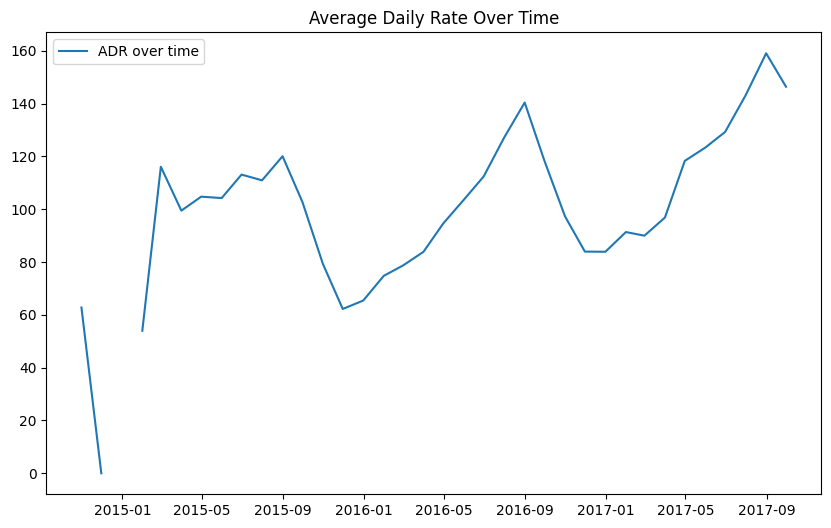

In [130]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

# Load the dataset
df4 = df

# Sort by date and set index
data = df4.sort_values('reservation_status_date')
data.set_index('reservation_status_date', inplace=True)

# Resample the data to monthly averages (you can also use weekly/daily)
data_resampled = data['adr'].resample('M').mean()

# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(data_resampled, label='ADR over time')
plt.title('Average Daily Rate Over Time')
plt.legend()
plt.show()

Check for Stationarity

In [131]:
# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

    if result[1] > 0.05:
        print("The time series is not stationary.")
    else:
        print("The time series is stationary.")

# Check stationarity
check_stationarity(data_resampled)

ADF Statistic: 0.4977275936773377
p-value: 0.9848038644497226
The time series is not stationary.


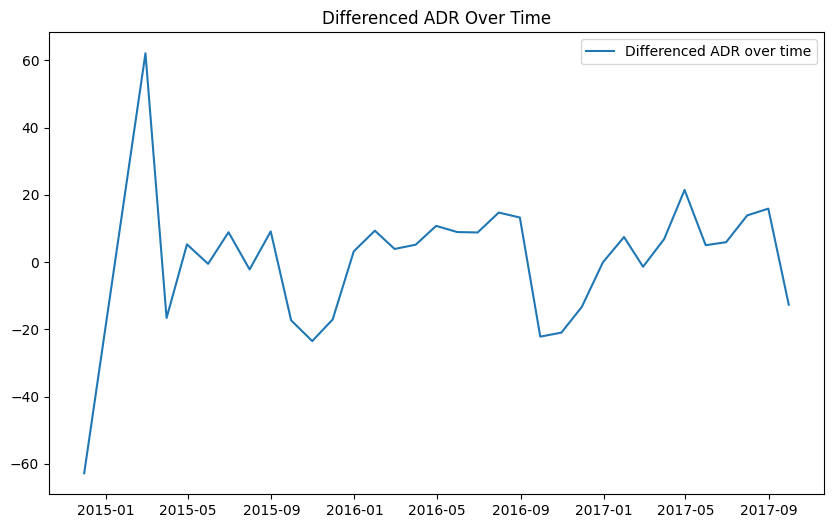

ADF Statistic: -4.680289302541126
p-value: 9.162785278291444e-05
The time series is stationary.


In [132]:
# Differencing to make the series stationary (if required)
data_diff = data_resampled.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10,6))
plt.plot(data_diff, label='Differenced ADR over time')
plt.title('Differenced ADR Over Time')
plt.legend()
plt.show()

# Check stationarity again
check_stationarity(data_diff)

In [133]:
# Train-test split (e.g., 80% training and 20% testing)
train_size = int(len(data_resampled) * 0.8)
train, test = data_resampled[:train_size], data_resampled[train_size:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Squared Error: 1725.7079926162796


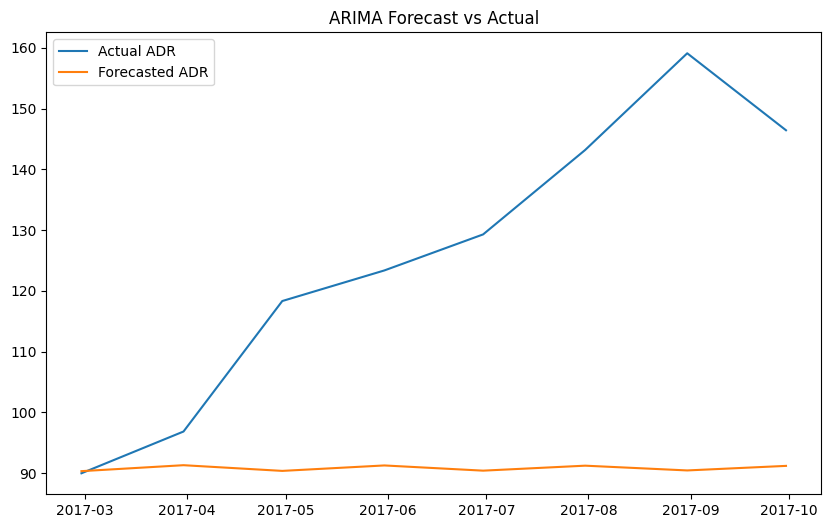

In [134]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # Adjust p, d, q based on ACF and PACF plots
arima_model = model.fit()

# Forecast
forecast = arima_model.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

# Plot actual vs forecasted values
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual ADR')
plt.plot(test.index, forecast, label='Forecasted ADR')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [135]:
import warnings
warnings.filterwarnings("ignore")
import itertools

# Define the p, d, and q values to take into consideration
p = d = q = range(0, 3)  # Adjust the range as needed
pdq = list(itertools.product(p, d, q))

# Perform a Grid Search over ARIMA parameters
best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        arima_result = model.fit()

        if arima_result.aic < best_aic:
            best_aic = arima_result.aic
            best_pdq = param
        print(f"ARIMA{param} - AIC: {arima_result.aic}")
    except:
        continue

print(f"Best ARIMA parameters: {best_pdq}")

ARIMA(0, 0, 0) - AIC: 259.9619522003301
ARIMA(0, 0, 1) - AIC: 251.50262854882817
ARIMA(0, 0, 2) - AIC: 235.04754326538776
ARIMA(0, 1, 0) - AIC: 237.74327826253125
ARIMA(0, 1, 1) - AIC: 238.6219312021917
ARIMA(0, 1, 2) - AIC: 237.84995198123562
ARIMA(0, 2, 0) - AIC: 237.23097097992604
ARIMA(0, 2, 1) - AIC: 239.23097096517483
ARIMA(0, 2, 2) - AIC: 235.2350713477553
ARIMA(1, 0, 0) - AIC: 246.78635890856202
ARIMA(1, 0, 1) - AIC: 245.601733325752
ARIMA(1, 0, 2) - AIC: 236.54249012116654
ARIMA(1, 1, 0) - AIC: 239.1829776575969
ARIMA(1, 1, 1) - AIC: 237.88573960789353
ARIMA(1, 1, 2) - AIC: 238.6802700658766
ARIMA(1, 2, 0) - AIC: 239.23097052767721
ARIMA(1, 2, 1) - AIC: 235.80755502356806
ARIMA(1, 2, 2) - AIC: 235.33731095328548
ARIMA(2, 0, 0) - AIC: 240.1917490840456
ARIMA(2, 0, 1) - AIC: 242.17175538213965
ARIMA(2, 0, 2) - AIC: 238.45874709709625
ARIMA(2, 1, 0) - AIC: 235.46617815672872
ARIMA(2, 1, 1) - AIC: 237.35927251530106
ARIMA(2, 1, 2) - AIC: 236.40229454670836
ARIMA(2, 2, 0) - AIC: 23

Best Model Mean Squared Error: 839.5804682179522


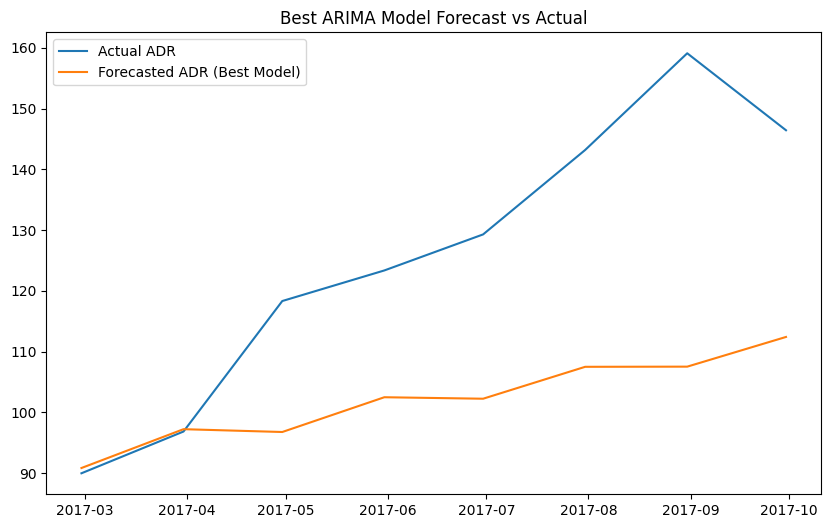

In [136]:
# Fit ARIMA with the best parameters
best_model = ARIMA(train, order=best_pdq)
best_arima_model = best_model.fit()

# Forecast using the best model
forecast_best = best_arima_model.forecast(steps=len(test))

# Evaluate the best model
best_mse = mean_squared_error(test, forecast_best)
print(f"Best Model Mean Squared Error: {best_mse}")

# Plot the forecast vs actual values
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual ADR')
plt.plot(test.index, forecast_best, label='Forecasted ADR (Best Model)')
plt.title('Best ARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

# Impact Quantification:

Data Preparation

In [137]:
df5 = df

In [138]:
columns_to_drop = ['is_canceled', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'market_segment', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'booking_changes', 'assigned_room_type', 'agent']
data_cleaned = df3.drop(columns=columns_to_drop)

In [151]:
# Handle categorical variables
categorical_features = data_cleaned.select_dtypes(include=['object', 'datetime']).columns
for feature in categorical_features:
    data_cleaned[feature] = LabelEncoder().fit_transform(data_cleaned[feature])

In [152]:
# Features and target variables
# Assuming that the dataset has 'adr'
X = data_cleaned.drop(['adr'], axis=1)  # Features
y_adr = data_cleaned['adr']  # Target: adr

# Train-test split
X_train, X_test, y_train_adr, y_test_adr = train_test_split(X, y_adr, test_size=0.2, random_state=42)

# Feature scaling (standardize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model 1: Linear Regression for adr

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear regression for adr prediction
lr_model_adr = LinearRegression()
lr_model_adr.fit(X_train_scaled, y_train_adr)

# Predict and evaluate
y_pred_adr = lr_model_adr.predict(X_test_scaled)
mse_adr = mean_squared_error(y_test_adr, y_pred_adr)

print(f'Linear Regression MSE for adr: {mse_adr}')

Linear Regression MSE for adr: 1557.2327771994287


Model 2: Random Forest Regressor with Hyperparameter Tuning

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest for adr prediction
rf_model_adr = RandomForestRegressor(random_state=42)
grid_search_adr = GridSearchCV(estimator=rf_model_adr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_adr.fit(X_train_scaled, y_train_adr)

# Best parameters and performance
print(f'Best Parameters for adr: {grid_search_adr.best_params_}')
best_rf_adr = grid_search_adr.best_estimator_

# Predict and evaluate
y_pred_rf_adr = best_rf_adr.predict(X_test_scaled)
mse_rf_adr = mean_squared_error(y_test_adr, y_pred_rf_adr)
print(f'Random Forest MSE for adr: {mse_rf_adr}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for adr: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest MSE for adr: 770.1588357046377


Model 3: XGBoost Regressor with Hyperparameter Tuning

In [157]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8]
}

# XGBoost for adr prediction
xgb_model_adr = xgb.XGBRegressor(random_state=42)
grid_search_xgb_adr = GridSearchCV(estimator=xgb_model_adr, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb_adr.fit(X_train_scaled, y_train_adr)

# Best parameters and performance
print(f'Best Parameters for XGBoost adr: {grid_search_xgb_adr.best_params_}')
best_xgb_adr = grid_search_xgb_adr.best_estimator_

# Predict and evaluate
y_pred_xgb_adr = best_xgb_adr.predict(X_test_scaled)
mse_xgb_adr = mean_squared_error(y_test_adr, y_pred_xgb_adr)
print(f'XGBoost MSE for adr: {mse_xgb_adr}')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for XGBoost adr: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}
XGBoost MSE for adr: 671.8917308444641


built three models—Linear Regression, Random Forest, and XGBoost—for predicting Revenue

These models can help quantify the expected impact of the pricing strategy on key business metrics

## Result:-

Preprocessing:-

1. Load and evaluate data
2. Dataset having 31994 duplicate values and those are successfully removed
3. Null values for the features children, country, agent, and company are 4, 452, 12193, and 82137, respectively.
4. Children, country, agent, and company variables have null values of 0.0046%, 0.5172%, 13.9514%, and 93.9826%, respectively. Variable companies having more than 50% null values
5. From above, children, country, and agent are discrete numerical variables, so replaced null values with modes, and the variable company had null values greater than 50%, so removed it.
6. Ouliers in the lead_time and adr variables were removed.
7. Coverting datatype of variables total_people and total_childrens to int64 from float64
feature  extraction
8. Converting "adults," "children," and "babies" to total_people by adding it
9. Create a feature for total stay nights
10. Creating 'total_childrens' variable by adding 'chldrens' and 'babies' variables
11. Creating 'reserved_room_assigned' variable which describe same room assigned or not
12. Creating 'lead_time_category' from 'lead_time' variale to display category
13. Creating 'guest_category' from variable 'total_people'
14. Adding night stays on week night and weekend night in one variable to 'total_stays'

EDA:-

1. Customers Prefer City hotel(61.1) more then Resort Hotel(38.9)
2. Maximum bookings get cancelled which is about 72.5% of all bookings.
3. Get 59.1% customers from online TA marcket segment which is maximum.
4. 82.4% customers are Transient type.
5. 50 Lead time frequency in majority of bookings.
6. Verage ADR between 50 to 150
7. Booking Duration is more in resort then City hotels.
8. Cancellation rate is low between november to february.
9. Verage ADR rate is more of room type C, F, G, H.
10. Maximum cancellation are in non refund category.
11. No corelation in ADR and Lead time.
12. PRT, GBR, FRA these Country has maximum cancellation rate.
13. A and D Rooms have maximum cancellation rate.
14. Majority of booking cancelled regardless of assign reserved room.
15. Customer more likely to stay when lead time is medium to high.
16. City hotels Prefer by majority of customer category.
17. The majority of canceled bookings were made through the TA/TO distribution channel. Bookings made through the Direct, Corporate, and GDS distribution channels are unlikely to be canceled.
18. Maximum booking cansilled in online ta marcket segment.
19. Room types G, followed by H, generate high ADR.
20. City hotels have maximum booking in may, sep, oct and resort have maximum booking in oct, dec.
21. City hotels generate more revenue (54.86%) than resort hotels (45.14%). Transient customers who book rooms for a short period of time generate more revenue than other types of customers.
22. Most of the customers dont want parcking space and very few want 1 parking.
23. PRT, GBR, FRA top 3 country by maximum booking
24. Agent nummber 9, 240 made most number of bookings.
25. Cancellation is not related to waiting days.

ML:-

Create 3 ML models for each problems and evaluate which model perform best and use pickel dump to get best model for final result.

Pricing Drivers Identification:- Linear regression model perform best in all three models

Customer Segment Analysis:- kmeans clustring model perform best in all three models

Pricing Strategy Development:- Linear regression model perform best in all three models